In [232]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

sns.set_theme(style="whitegrid")
%matplotlib inline

In [233]:
df = pd.read_csv('german.csv', sep=';', index_col=False)

df.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [234]:
df.shape

(1000, 21)

In [235]:
print(list(df.columns))

['Creditability', 'Account_Balance', 'Duration_of_Credit_monthly', 'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount', 'Value_Savings_Stocks', 'Length_of_current_employment', 'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors', 'Duration_in_Current_address', 'Most_valuable_available_asset', 'Age_years', 'Concurrent_Credits', 'Type_of_apartment', 'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents', 'Telephone', 'Foreign_Worker']


In [236]:
df.describe()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_Amount                      1000 non-null   int64
 6   Value_Savings_Stocks               1000 non-null   int64
 7   Length_of_current_employment       1000 non-null   int64
 8   Instalment_per_cent                1000 non-null   int64
 9   Sex_Marital_Status                 1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_Current_address        1000 non-null   int64
 12  Most_valuable_availab

In [238]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Creditability                        0
Account_Balance                      0
Duration_of_Credit_monthly           0
Payment_Status_of_Previous_Credit    0
Purpose                              0
Credit_Amount                        0
Value_Savings_Stocks                 0
Length_of_current_employment         0
Instalment_per_cent                  0
Sex_Marital_Status                   0
Guarantors                           0
Duration_in_Current_address          0
Most_valuable_available_asset        0
Age_years                            0
Concurrent_Credits                   0
Type_of_apartment                    0
No_of_Credits_at_this_Bank           0
Occupation                           0
No_of_dependents                     0
Telephone                            0
Foreign_Worker                       0
dtype: int64


In [239]:
def count_duplicate_rows(data):
    """
    
    """   
    duplicate_count = data.duplicated().sum()
    return duplicate_count
print(f"Number of duplicates: {count_duplicate_rows(df)}")

Number of duplicates: 0



Class Distribution:
Creditability
1    700
0    300
Name: count, dtype: int64


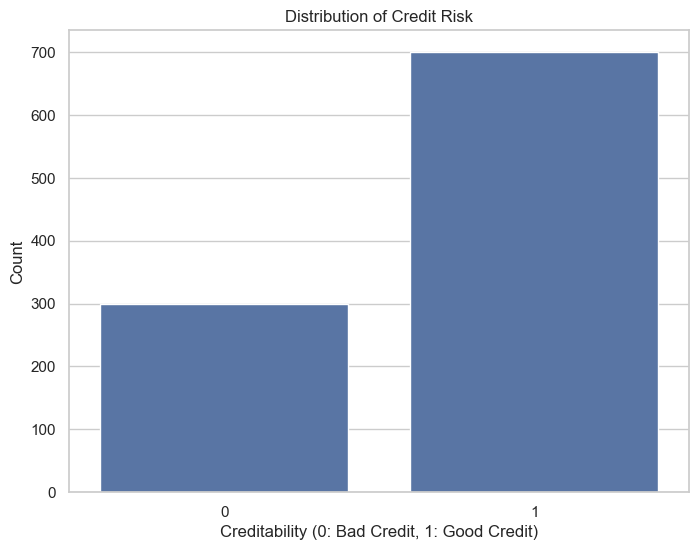

In [240]:
# Check class distribution
class_distribution = df['Creditability'].value_counts()
print("\nClass Distribution:")
print(class_distribution)

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Creditability')
plt.title('Distribution of Credit Risk')
plt.xlabel('Creditability (0: Bad Credit, 1: Good Credit)')
plt.ylabel('Count')
plt.show()

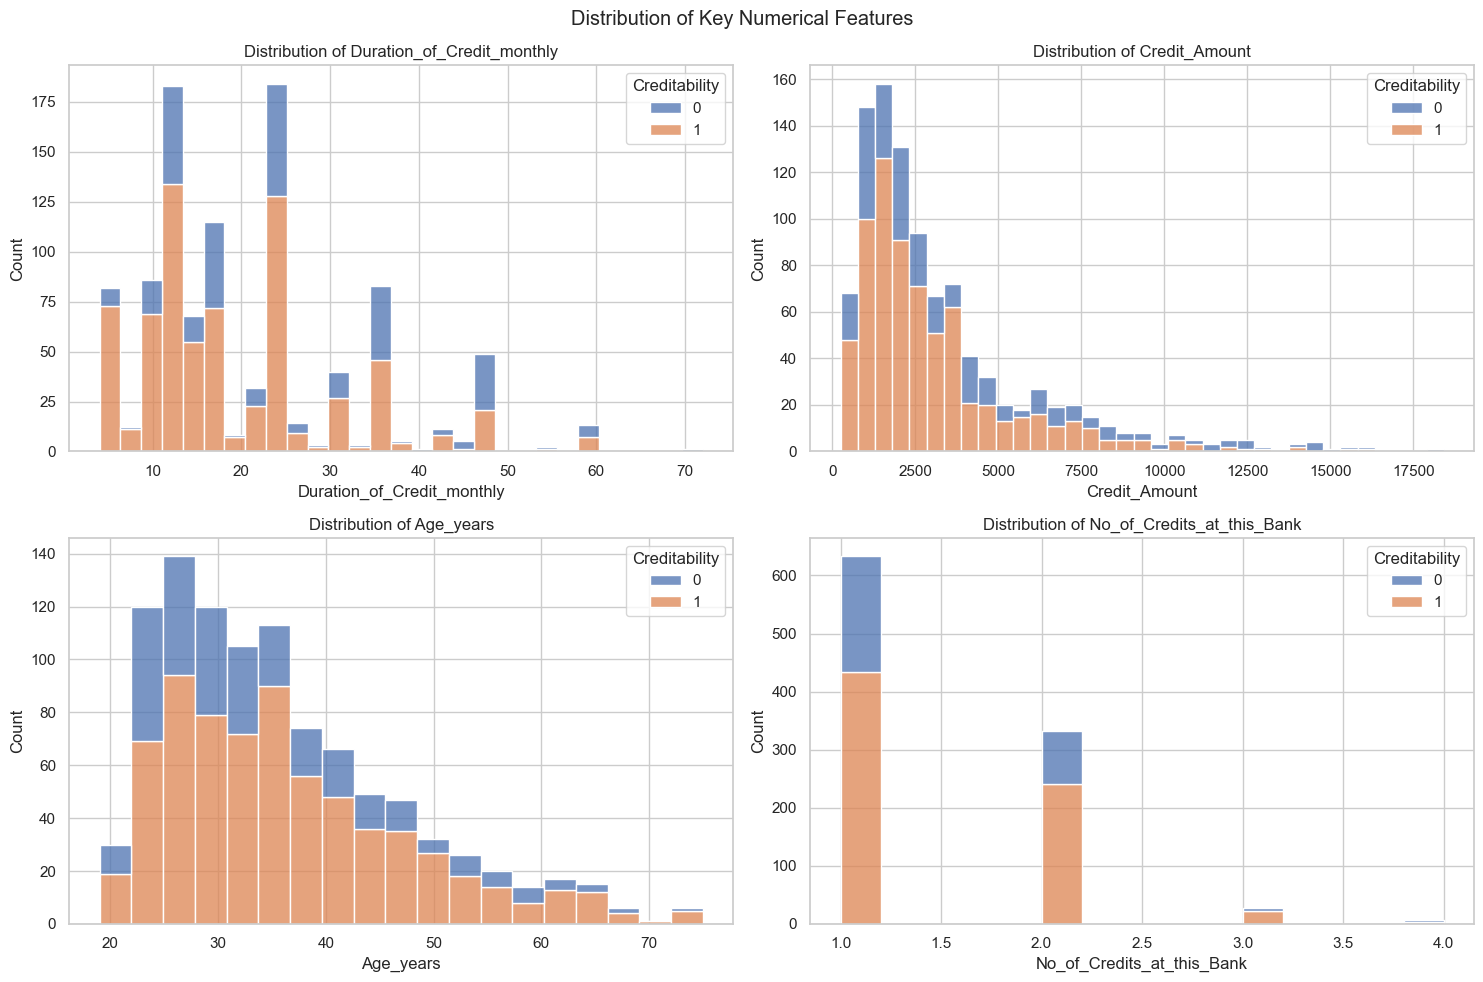

In [241]:
# Select numerical columns
numerical_cols = ['Duration_of_Credit_monthly', 'Credit_Amount', 'Age_years', 'No_of_Credits_at_this_Bank']

# Create distribution plots for numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Key Numerical Features')

for idx, col in enumerate(numerical_cols):
    row = idx // 2
    col_idx = idx % 2
    sns.histplot(data=df, x=col, hue='Creditability', multiple="stack", ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

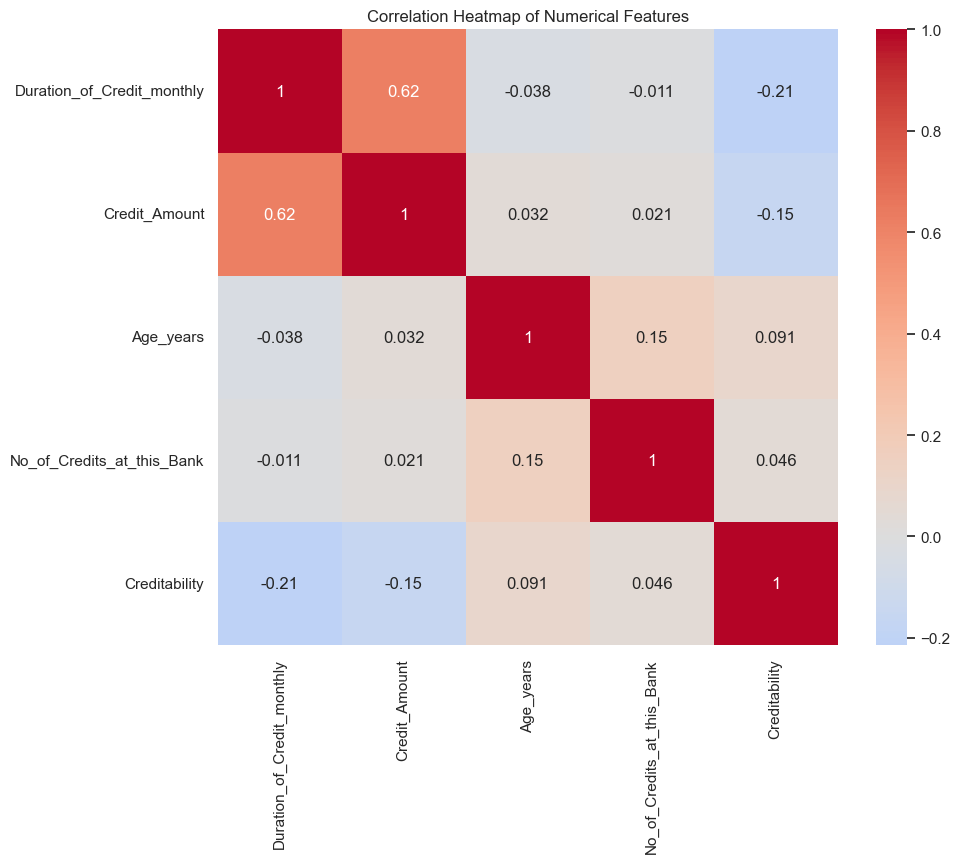

In [242]:
# Create correlation matrix for numerical features
correlation_matrix = df[numerical_cols + ['Creditability']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

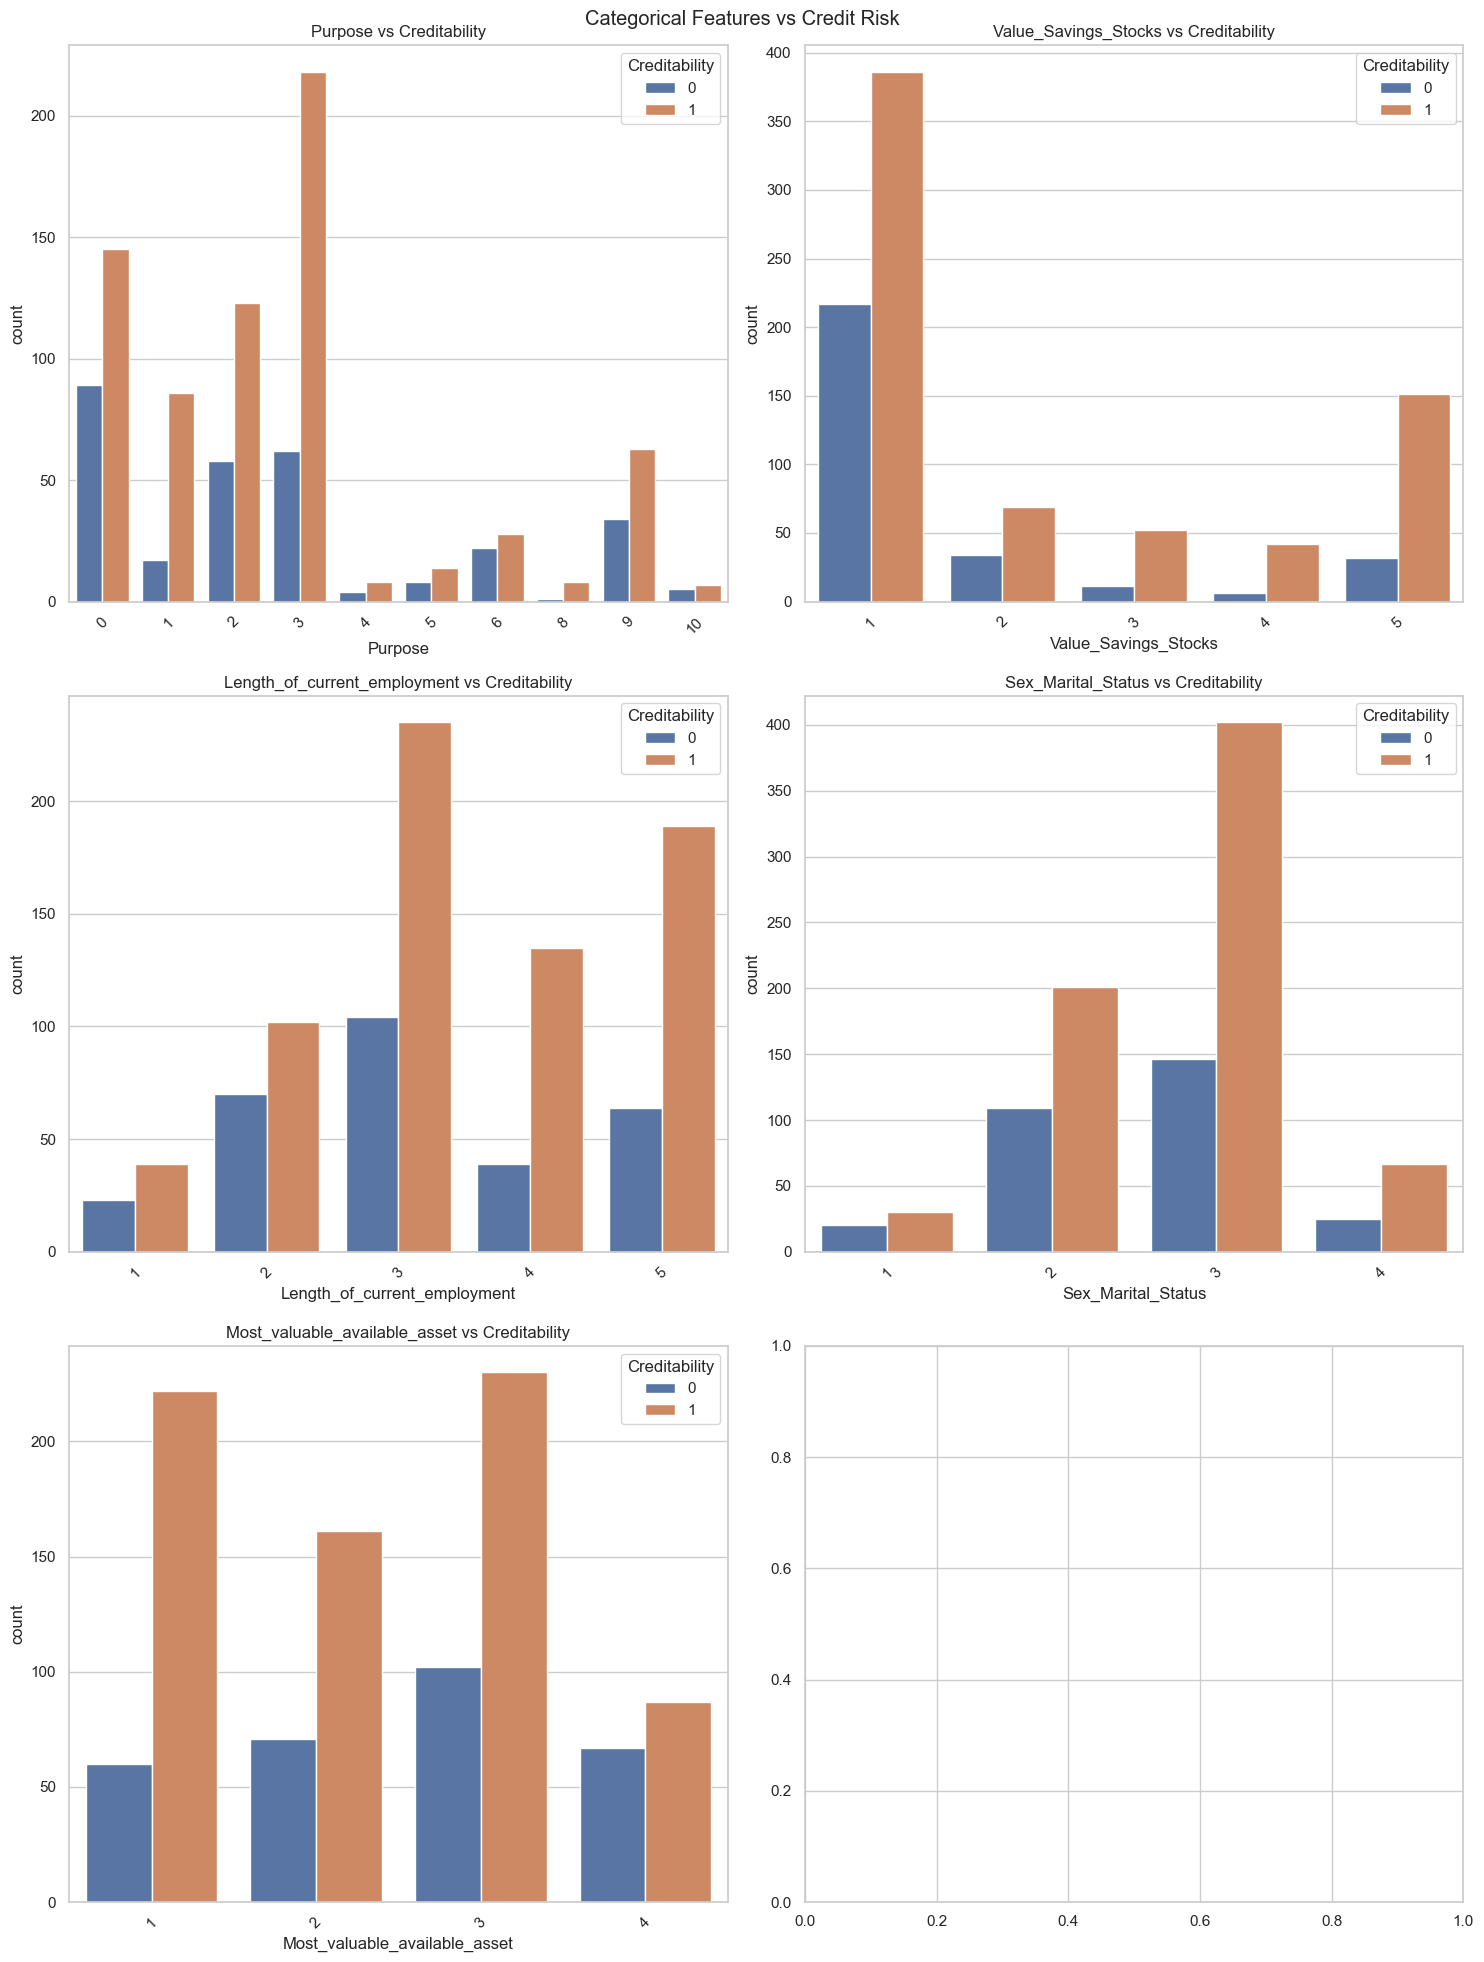

In [243]:
# Select categorical columns
categorical_cols = ['Purpose', 'Value_Savings_Stocks', 'Length_of_current_employment', 'Sex_Marital_Status', 'Most_valuable_available_asset']

# Create bar plots for categorical features vs target
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
fig.suptitle('Categorical Features vs Credit Risk')

for idx, col in enumerate(categorical_cols):
    row = idx // 2
    col_idx = idx % 2
    if idx < len(categorical_cols):
        sns.countplot(data=df, x=col, hue='Creditability', ax=axes[row, col_idx])
        axes[row, col_idx].set_title(f'{col} vs Creditability')
        axes[row, col_idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Feature Correlations with Credit Risk:
Creditability                        1.000000
Account_Balance                      0.350847
Payment_Status_of_Previous_Credit    0.228785
Value_Savings_Stocks                 0.178943
Length_of_current_employment         0.116002
Concurrent_Credits                   0.109844
Age_years                            0.091272
Sex_Marital_Status                   0.088184
Foreign_Worker                       0.082079
No_of_Credits_at_this_Bank           0.045732
Telephone                            0.036466
Guarantors                           0.025137
Type_of_apartment                    0.018119
No_of_dependents                     0.003015
Duration_in_Current_address         -0.002967
Purpose                             -0.017979
Occupation                          -0.032735
Instalment_per_cent                 -0.072404
Most_valuable_available_asset       -0.142612
Credit_Amount                       -0.154740
Duration_of_Credit_monthly          -0.21

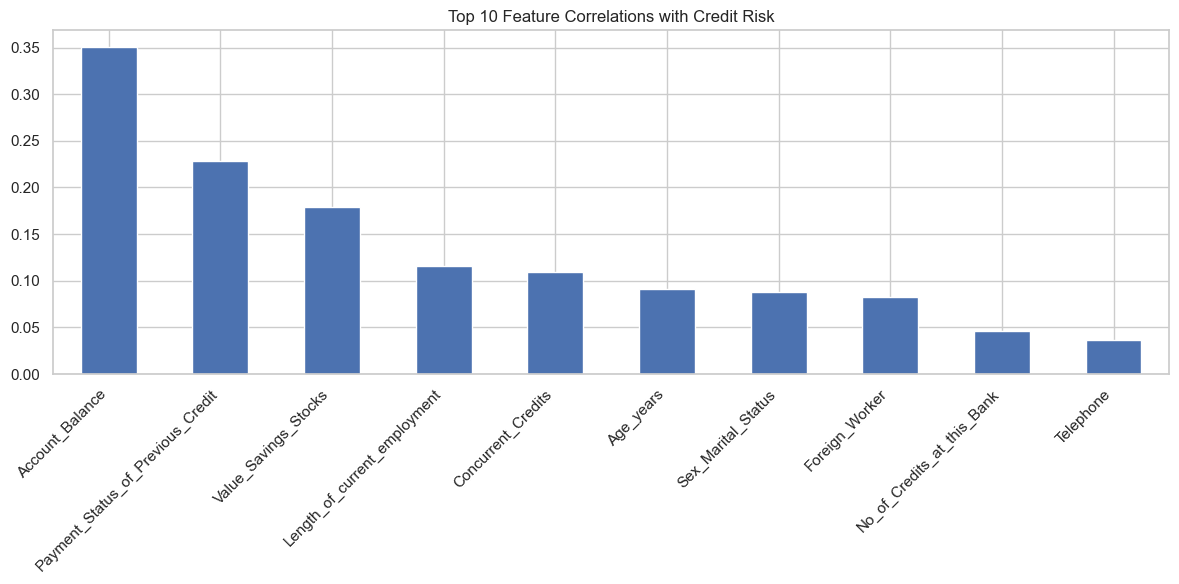

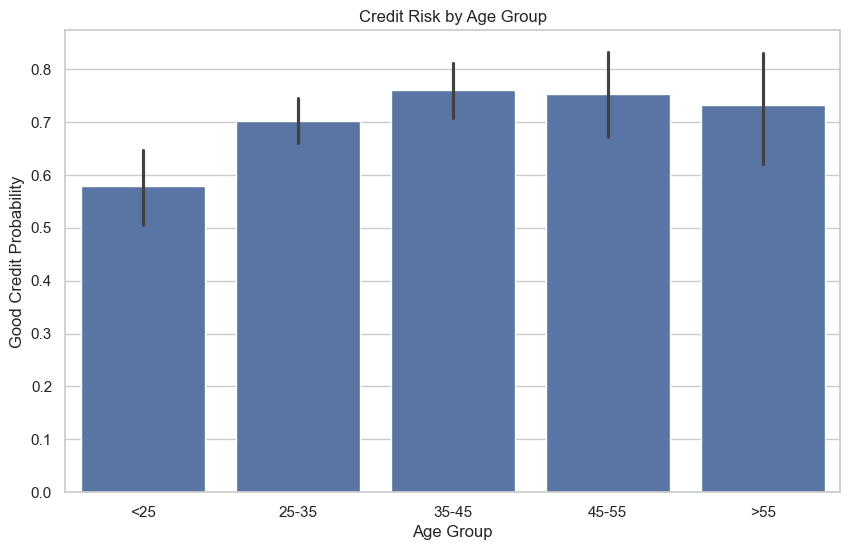

In [244]:
# Calculate feature correlations with target
correlations = df.corr()['Creditability'].sort_values(ascending=False)
print("Feature Correlations with Credit Risk:")
print(correlations)

# Plot top correlations
plt.figure(figsize=(12, 6))
correlations[1:11].plot(kind='bar')
plt.title('Top 10 Feature Correlations with Credit Risk')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze risk factors by age groups
df['Age_Group'] = pd.cut(df['Age_years'], 
                        bins=[0, 25, 35, 45, 55, 100],
                        labels=['<25', '25-35', '35-45', '45-55', '>55'])

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age_Group', y='Creditability')
plt.title('Credit Risk by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Good Credit Probability')
plt.show()

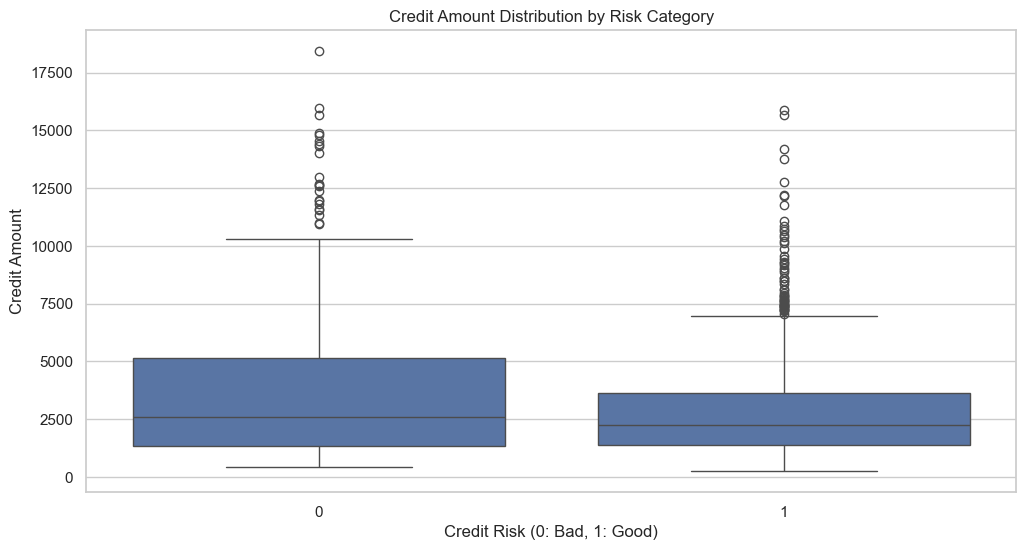

C:\Users\moten\AppData\Local\Temp\ipykernel_24716\2944399534.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_risk_by_amount = df.groupby('Credit_Amount_Category')['Creditability'].mean()


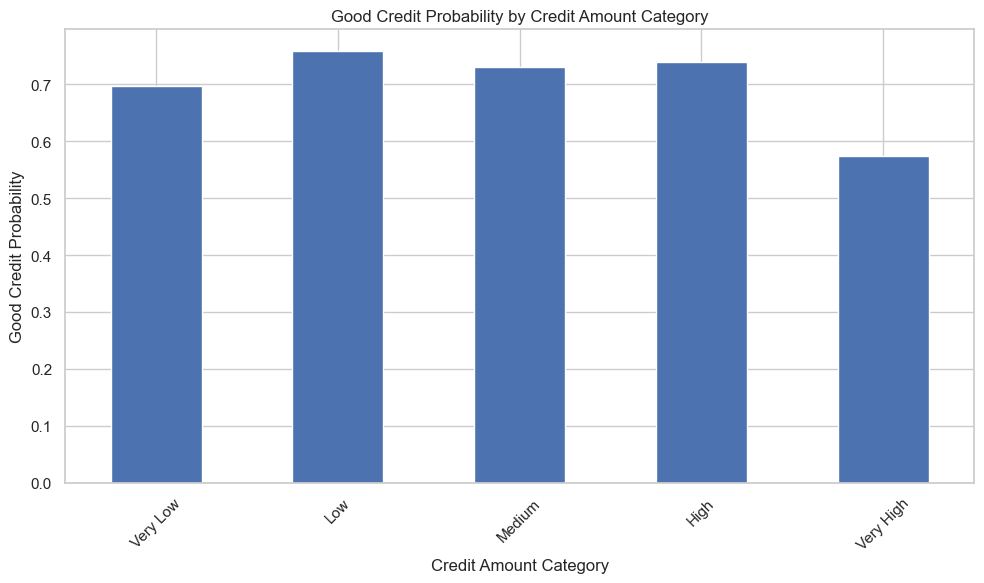

In [245]:
# Analyze credit amount distribution by risk category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Creditability', y='Credit_Amount')
plt.title('Credit Amount Distribution by Risk Category')
plt.xlabel('Credit Risk (0: Bad, 1: Good)')
plt.ylabel('Credit Amount')
plt.show()

# Create credit amount bins and analyze risk distribution
df['Credit_Amount_Category'] = pd.qcut(df['Credit_Amount'], q=5, 
                                       labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

credit_risk_by_amount = df.groupby('Credit_Amount_Category')['Creditability'].mean()
plt.figure(figsize=(10, 6))
credit_risk_by_amount.plot(kind='bar')
plt.title('Good Credit Probability by Credit Amount Category')
plt.xlabel('Credit Amount Category')
plt.ylabel('Good Credit Probability')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

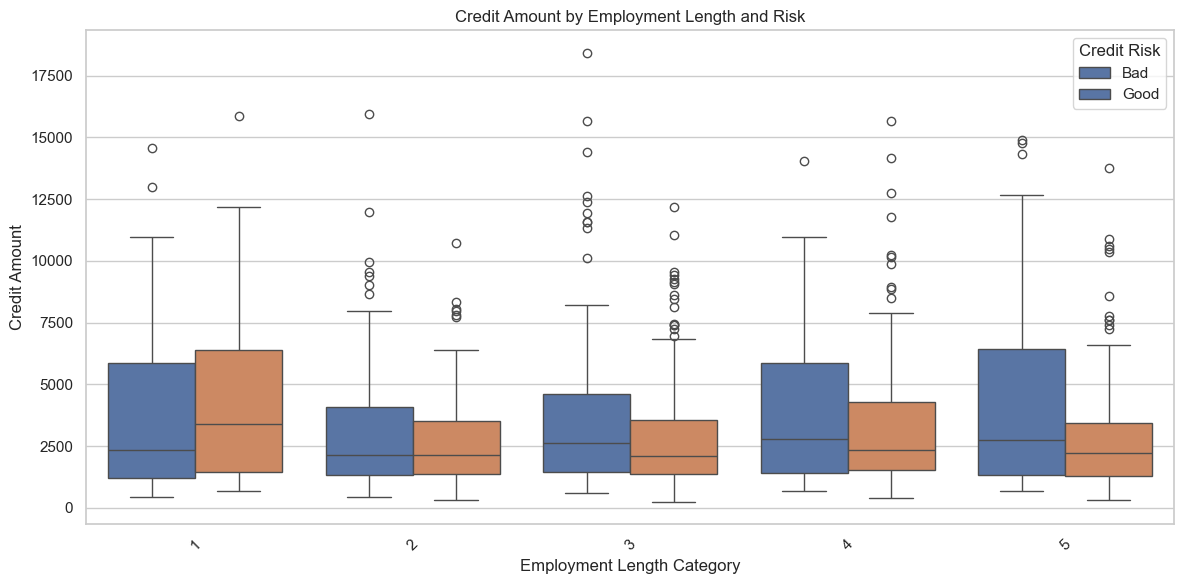


Risk Analysis by Employment Duration:
                              Good_Credit_Rate  Count
Length_of_current_employment                         
1                                     0.629032     62
2                                     0.593023    172
3                                     0.693215    339
4                                     0.775862    174
5                                     0.747036    253


In [246]:
# Analyze employment duration impact
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Length_of_current_employment', y='Credit_Amount', hue='Creditability')
plt.title('Credit Amount by Employment Length and Risk')
plt.xlabel('Employment Length Category')
plt.ylabel('Credit Amount')
plt.legend(title='Credit Risk', labels=['Bad', 'Good'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate risk rates by employment duration
emp_risk = df.groupby('Length_of_current_employment')['Creditability'].agg(['mean', 'count'])
emp_risk.columns = ['Good_Credit_Rate', 'Count']
print("\nRisk Analysis by Employment Duration:")
print(emp_risk)

C:\Users\moten\AppData\Local\Temp\ipykernel_24716\755146004.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  risk_matrix = df.pivot_table(values='Creditability', index='Credit_Amount_Category',


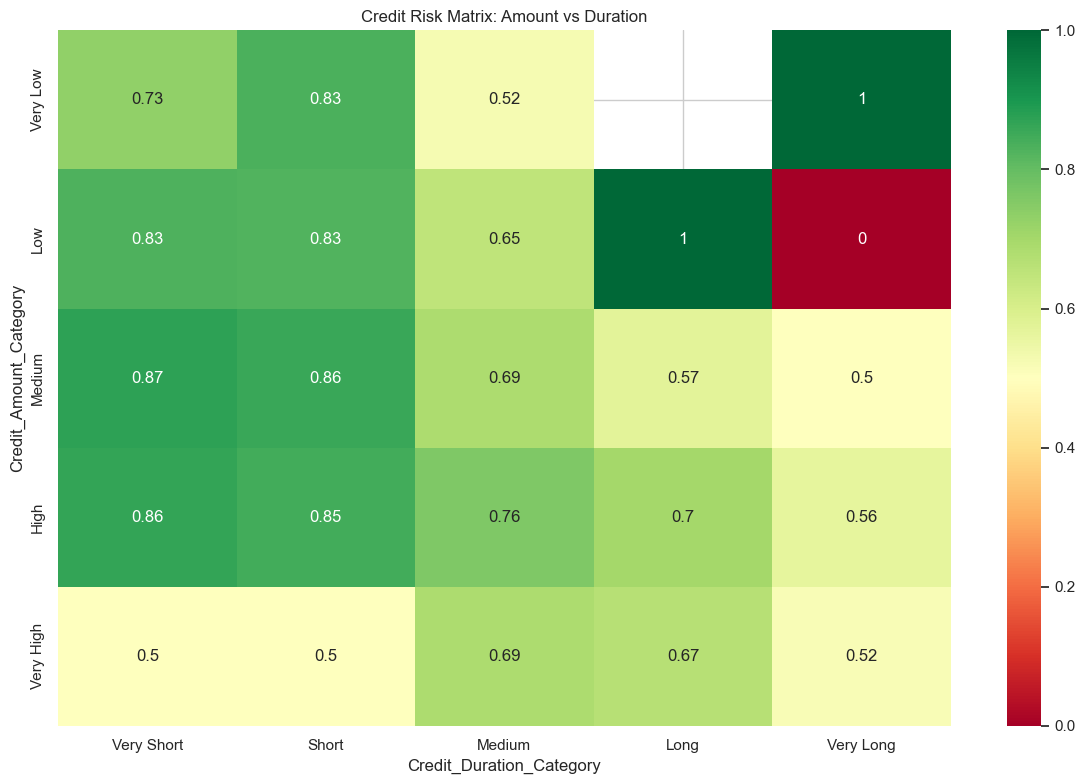

In [247]:
# Create a risk matrix of Credit Amount vs Duration
df['Credit_Duration_Category'] = pd.qcut(df['Duration_of_Credit_monthly'], q=5,
                                         labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])

risk_matrix = df.pivot_table(values='Creditability', index='Credit_Amount_Category', 
                             columns='Credit_Duration_Category', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(risk_matrix, annot=True, cmap='RdYlGn', center=0.5)
plt.title('Credit Risk Matrix: Amount vs Duration')
plt.tight_layout()
plt.show()

In [248]:
# Separate features and target
X = df.drop('Creditability', axis=1)
y = df['Creditability']

In [249]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [250]:
# Standardize numerical features
scaler = StandardScaler()
num_cols = ['Duration_of_Credit_monthly', 'Credit_Amount', 'Age_years']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])